# Importing Libraries

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
train_dir = "../Data/train"
test_dir = "../Data/test"

trainGen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2, width_shift_range=0.1, height_shift_range=0.1)
testGen = ImageDataGenerator(rescale=1./255)


train_gen = trainGen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode="binary")
test_gen = testGen.flow_from_directory(test_dir, batch_size=3 , target_size=(224, 224), class_mode="binary")

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [21]:
print("Training samples:", train_gen.samples)
print("Test samples:", test_gen.samples)
print("Class indices:", train_gen.class_indices)

Training samples: 8005
Test samples: 2023
Class indices: {'cats': 0, 'dogs': 1}


In [22]:
model = models.Sequential([
    layers.Input(shape=(224,224,3)),


    Conv2D(32 , (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation = 'relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    MaxPooling2D(2,2),



    Flatten(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')

])

In [23]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,813,633 (25.99 MB)

 Trainable params: 6,812,417 (25.99 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [25]:
history = model.fit(train_gen,
                    epochs=50,
                    validation_data=test_gen,
                    verbose=1,
                    steps_per_epoch=train_gen.samples // train_gen.batch_size,
                    validation_steps=test_gen.samples // test_gen.batch_size)

c:\Users\bilal\Documents\Github\CatvsDog\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy = model.evaluate(test_gen)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.7447 - loss: 0.5184
Test Accuracy: 0.74


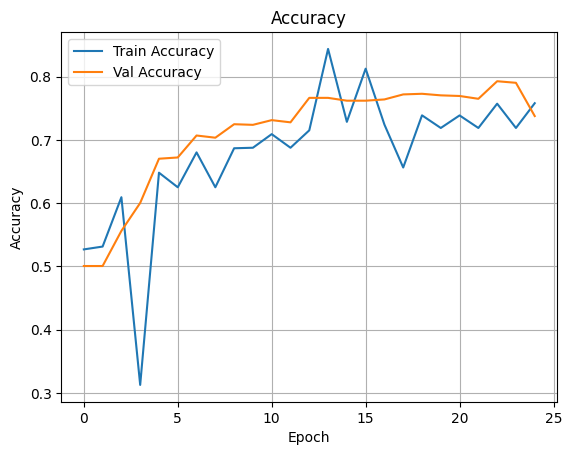

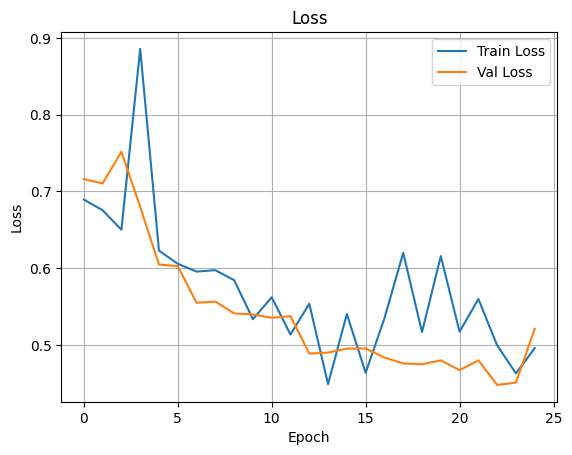

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "../Data/test/cats/cat.4010.jpg"  # example path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0  # normalize
img_array = np.expand_dims(img_array, axis=0)  # shape (1, 150, 150, 3)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Predicted: Dog 🐶")
else:
    print("Predicted: Cat 🐱")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted: Dog 🐶
